## Supplementary notebook for Post-embryonic development and aging of the appendicular skeleton in Ambystoma mexicanum

### Camilo Riquelme-Guzmán1, Maritta Schuez1, Alexander Böhm1, Dunja Knapp1, Sandra S. Edwards1, Alberto S. Ceccarelli2, Osvaldo Chara2,3,4, Martina Rauner5,6, Tatiana Sandoval-Guzmán1,6

##### 1 Technische Universität Dresden, CRTD/ Center for Regenerative Therapies TU Dresden, Dresden, Germany.
##### 2 System Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySiB), National Scientific and Technical Research Council (CONICET) and University of La Plata, La Plata, Argentina.
##### 3 Institute of Technology, Argentinian University of Business (UADE), Buenos Aires, Argentina.
##### 4 Center for Information Services and High Performance Computing (ZIH),  Technische Universität Dresden, Dresden, Germany.
##### 5 Department of Medicine III, Universitätsklinikum Dresden, Dresden, Germany.
##### 6 Center for Healthy Aging, Universitätsklinikum Dresden, Dresden, Germany.

##### This work is available at: https://www.biorxiv.org/content/10.1101/2021.03.05.434057v1

##### This notebook was developed by Alberto S. Ceccarelli and Osvaldo Chara. 
##### aceccarelli@iflysib.unlp.edu.ar (ASC) and osvaldo.chara@tu-dresden.de (OC)

## The next cell plots fig 1A from the paper.
#### Run the following cell to plot fig 1A from the paper and to save it as a png image.

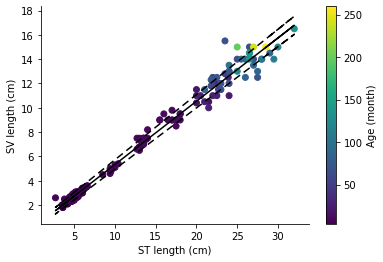

In [5]:
# Import libraries.
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
import scipy.stats

# Read the data.
dataset = "SV"
df = pd.read_excel(io="AxolotlGrowth.xlsx", sheet_name=str(dataset))
Ca_data_sv = df["ST in cm"]
tspan = df["Age in months"]
dataset = "ST"
df2 = pd.read_excel(io="AxolotlGrowth.xlsx", sheet_name=str(dataset))
Ca_data_tl = df2["ST in cm"]

# Define the function to fit.

def fitfunc(x, a, b):
    return a+b*x

# Fit the selected function to data.
k_fit, kcov = curve_fit(fitfunc, Ca_data_tl, Ca_data_sv,absolute_sigma=True)

# Calculate the standard deviation from the fit.

std = np.sqrt(np.diag(kcov))

# Calculate the predicted line from the results of the fit and its deviation.

tfit = Ca_data_tl
fit = fitfunc(tfit, k_fit[0], k_fit[1])
fit2 = fitfunc(tfit, k_fit[0]+ 2 * std[0], k_fit[1]+ 2 * std[1]) 
fit3 = fitfunc(tfit, k_fit[0]- 2 * std[0], k_fit[1]- 2 * std[1]) 

# Plot the curves and experimental data.

plt.plot(tfit, fit, color="black")
plt.plot(tfit, fit2, color="black",linestyle="dashed", dashes=(5, 3))
plt.plot(tfit, fit3, color="black",linestyle="dashed", dashes=(5, 3))
plt.scatter(Ca_data_tl,Ca_data_sv, c=tspan, cmap="viridis")
plt.colorbar(label='Age (month)')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlabel("ST length (cm)")
plt.ylabel("SV length (cm)")
plt.savefig("Fig1A.png",dpi=300)
plt.show()
plt.close()

## The next cell plots fig 1B and fig 1C from the paper.
#### Run the following cell to plot fig 1B and fig 1C from the paper and to save them as a png image.

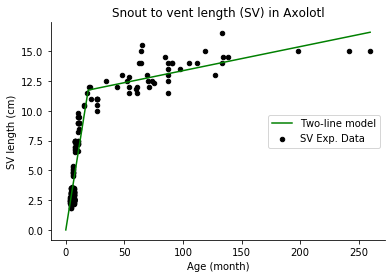

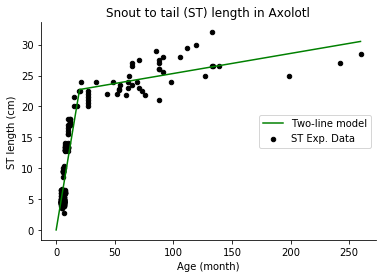

In [2]:
# Import libraries.
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy

# Choose data set. Options are "SV" or "TL". Remember to put the excel file on the same folder as this jupyter notebook.

sheet = ["SV", "ST"]

# Select the number of samples for the bootstrap method.

n_bootstrap=1

# Sweeps over all posible combinations of datasets. 

for dataset in sheet:

    # Read the data.

    df = pd.read_excel(io="AxolotlGrowth.xlsx", sheet_name=str(dataset))

    tspan = df["Age in months"]

    Ca_data = df["ST in cm"]

    # Define target function:

    def fitfunc(x, xc, y0, m1, m2):
        return (y0 + m1 * x)*(np.sign(xc-x) + 1)*0.5+(y0 + m1 * xc + m2 * (x - xc))*(np.sign(x-xc) + 1)*0.5

    # Fit the selected function to data.
    
    # Set the initial guess.
    
    po_guess = [15,0,2.6,0.01]
    
    # Set the parameters constrains.   
    
    boundaries = ([10, 0, 0, 0], [50, 50, 100, 100])
    
    # Fit the function
    
    k_fit, kcov = curve_fit(fitfunc, tspan, Ca_data, p0=po_guess, bounds=boundaries)
    
    # R squared calcularion
    residuals = Ca_data - fitfunc(tspan, *k_fit)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((Ca_data-np.mean(Ca_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Akaike information criterion

    n = len(Ca_data)
    k = len(k_fit) + 1
    AIC= 2*k + n * np.log(ss_res/n) + (2 * k**2 + 2 * k)/(n-k-1)

    # Bootstrap method

    # Different arrays

    xc_array = []
    y0_array = []
    m1_array = []
    m2_array = []

    # run n samples.

    for i in range(n_bootstrap):
        tspan_bootstrap = copy.deepcopy(tspan)
        Ca_data_bootstrap = copy.deepcopy(Ca_data)
        b , c = random.sample(range(len(Ca_data_bootstrap)), 2)
        tspan_bootstrap[b] = tspan_bootstrap[c]
        Ca_data_bootstrap [b] = Ca_data_bootstrap [c]
        k_fit2, kcov2 = curve_fit(fitfunc, tspan_bootstrap, Ca_data_bootstrap, p0=po_guess, bounds=boundaries)
        xc_array.append(k_fit2[0])
        y0_array.append(k_fit2[1])
        m1_array.append(k_fit2[2])
        m2_array.append(k_fit2[3])

    # Calculate mean and standard deviation

    xc_mean = np.mean(xc_array)
    xc_std = np.std(xc_array)
    y0_mean = np.mean(y0_array)
    y0_std = np.std(y0_array)
    m1_mean = np.mean(m1_array)
    m1_std = np.std(m1_array)
    m2_mean = np.mean(m2_array)
    m2_std = np.std(m2_array)
    
    # Print on screan the previous information. Uncomment to excute (commented by default). 
    # Add another print for other variables if needed.
    
    # print("Mean of transition age:",xc_mean,"and standard deviation of transition age:",xc_std)
    # print("Mean of y0:",y0_mean,"and standard deviation of y0:",y0_std)
    # print("Mean of m1:",m1_mean,"and standard deviation of m1:",m1_std)
    # print("Mean of m2:",m2_mean,"and standard deviation of m2:",m2_std)

    # Generation of data to plot the result of the fit.
    
    tfit = np.arange(0,max(tspan),0.01);
    fit = fitfunc(tfit, k_fit[0],k_fit[1],k_fit[2],k_fit[3])

    # Plot.
    
    if dataset=="ST":
        plt.scatter(tspan, Ca_data, label='ST Exp. Data',color="black", s=20)
    elif dataset=="SV":
        plt.scatter(tspan, Ca_data, label='SV Exp. Data',color="black", s=20)            
    plt.plot(tfit, fit, label='Two-line model',color="g")
    plt.legend(loc=7)
    if dataset=="ST":
        plt.title("Snout to tail (ST) length in Axolotl")
    elif dataset=="SV":
        plt.title("Snout to vent length (SV) in Axolotl")
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.xlabel("Age (month)")
    if dataset=="ST":
        plt.ylabel("ST length (cm)")
    elif dataset=="SV":
        plt.ylabel("SV length (cm)")                     
    if dataset=="ST":
        plt.savefig("Fig1B.png",dpi=300)
    elif dataset=="SV":
        plt.savefig("Fig1C.png",dpi=300)
    plt.show()
    plt.close()

## The next cell plots fig 1D, fig 1E, fig 1F and fig 1G from the paper.
#### Run the following cell to plot fig 1D, fig 1E, fig 1F and fig 1G  from the paper and to save them as a png image.

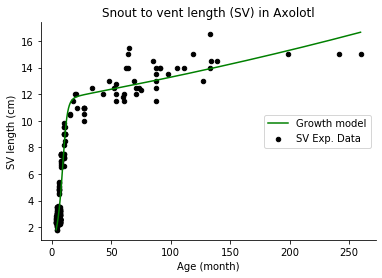

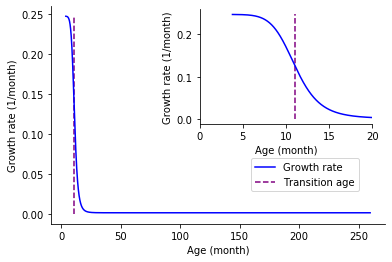

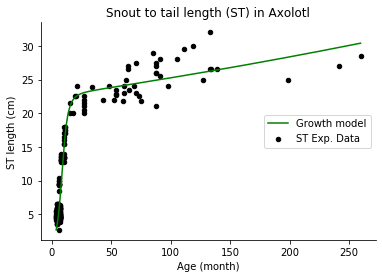

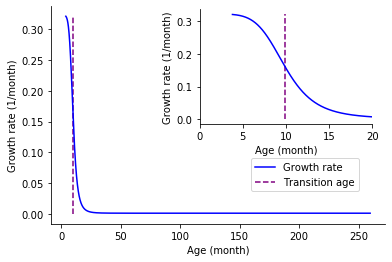

In [3]:
# Import libraries.
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy


# Choose data set. Options are "SV" or "TL". Remember to put the excel file on the same folder as this jupyter notebook.

sheet = ["SV", "ST"]

# Sweeps over all posible combinations of datasets. 

for dat in sheet:
    
    dataset = dat

    # number of samples for the bootstrap method.

    n_bootstrap=1
    
    # Set the initial guess.

    po_guess = [15,0]
    
    # Set the parameters constrains. 
    
    boundaries = ([0, 0], [50, 50]) 

    # Read the data.

    df = pd.read_excel(io="AxolotlGrowth.xlsx", sheet_name=str(dataset))

    tspan = df["Age in months"]

    Ca_data = df["ST in cm"]
    
    # Translate the time to start on t0=0 because it helps the ode integrator.    

    t2=[]
    for i in range(len(tspan)):
        t2.append(tspan[i]-tspan[0])
        
    # Define the growth rate as a hill function.    

    def hill(x, y0, a,c,n):
        return c+y0/(1+(a*(x+tspan[0]))**n)
    
    # Define the target function to fit.

    def fitfunc(x, y0, a,c,n):
        'Function that returns Ca computed from an ODE for a k'
        def myode(v,x):
            return (c+y0/(1+(a*(x+tspan[0]))**n))*v
        v0 = min(Ca_data)
        Casol = odeint(myode, v0, x)
        return Casol[:,0]
    
    # Comment: In the paper some of these variables are defined differently.
    # To do the fit it is better to define them this way.
    # The variables from the paper can be obtained from these variables as:
    # R_inf = c
    # R0 = c + y0
    # The transition age is equal to 1/a.
    
    # Fit the selected function to data.
    
    k_fit, kcov = curve_fit(fitfunc, t2, Ca_data, p0=[1,0.20477636,0.00112588,3],bounds=([0,0,0,0], [100,1,10,100]), maxfev=100000)

     # R squared calcularion
        
    residuals = Ca_data - fitfunc(t2, *k_fit)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((Ca_data-np.mean(Ca_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Akaike information criterion

    n = len(Ca_data)
    k = len(k_fit) + 1
    AIC= 2*k + n * np.log(ss_res/n) + (2 * k**2 + 2 * k)/(n-k-1)

    # Bootstrap method

    # Different arrays

    xc_array = []
    y0_array = []
    m1_array = []
    m2_array = []

    # run n samples.

    for i in range(n_bootstrap):
        tspan_bootstrap = copy.deepcopy(t2)
        Ca_data_bootstrap = copy.deepcopy(Ca_data)
        b , c = random.sample(range(len(Ca_data_bootstrap)), 2)
        tspan_bootstrap[b] = tspan_bootstrap[c]
        Ca_data_bootstrap [b] = Ca_data_bootstrap [c]
        tspan_bootstrap, Ca_data_bootstrap = zip(*sorted(zip(tspan_bootstrap, Ca_data_bootstrap)))
        k_fit2, kcov2 = curve_fit(fitfunc, tspan_bootstrap, Ca_data_bootstrap, p0=[1,0.20477636,0.00112588,3],bounds=([0,0,0,0], [100,1,10,100]), maxfev=100000)
        xc_array.append(k_fit2[0])
        y0_array.append(k_fit2[1])
        m1_array.append(k_fit2[2])
        m2_array.append(k_fit2[3])

    # Calculate mean and standar deviation

    xc_mean = np.mean(xc_array)
    xc_std = np.std(xc_array)
    y0_mean = np.mean(y0_array)
    y0_std = np.std(y0_array)
    m1_mean = np.mean(m1_array)
    m1_std = np.std(m1_array)
    m2_mean = np.mean(m2_array)
    m2_std = np.std(m2_array)

    # Print on screan the previous information. Uncomment to excute (commented by default). 
    # Add another print for other variables if needed.
    
    # print("Mean of y0:",xc_mean,"and standard deviation of y0:",xc_std)
    # print("Mean of y0a:",y0_mean,"and standard deviation of a:",y0_std)
    # print("Mean of c:",m1_mean,"and standard deviation of c:",m1_std)
    # print("Mean of n:",m2_mean,"and standard deviation of n:",m2_std)
    
    # Generation of data to plot the result of the fit.
    
    tfit = np.arange(0,max(t2),0.0001);
    fit = fitfunc(tfit, k_fit[0], k_fit[1], k_fit[2], k_fit[3])
    fit2 = hill(tfit, k_fit[0], k_fit[1], k_fit[2], k_fit[3])
    for i in range(len(tfit)):
        tfit[i]+=tspan[0]

    # Plot fig 1D and fig 1E.
    
    if dataset=="ST":
        plt.scatter(tspan, Ca_data, label='ST Exp. Data',color="black", s=20)
    elif dataset=="SV":
        plt.scatter(tspan, Ca_data, label='SV Exp. Data',color="black", s=20) 
    plt.plot(tfit, fit, label='Growth model',color="g")
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    if dataset=="ST":
        plt.title("Snout to tail length (ST) in Axolotl")
    elif dataset=="SV":
        plt.title("Snout to vent length (SV) in Axolotl")
    plt.legend(loc=7)
    plt.xlabel("Age (month)")
    if dataset=="ST":
        plt.ylabel("ST length (cm)")
    elif dataset=="SV":
        plt.ylabel("SV length (cm)") 
    if dataset=="ST":
        plt.savefig("Fig1D.png",dpi=500)
    elif dataset=="SV":
        plt.savefig("Fig1E.png",dpi=500)
    plt.show()
    plt.close()
    
    # Plot fig 1F and fig 1G.
    
    plt.plot(tfit, fit2, label='Growth rate',color="blue")
    plt.vlines(1/k_fit[1], 0, max(fit2), linestyle="dashed", label='Transition age',color="purple")
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.legend(loc=(0.6,0.15))
    plt.xlabel("Age (month)")
    plt.ylabel("Growth rate (1/month)")
    
    # Create a zoom of the plot inside the plot.
    
    sub_axes = plt.axes([.47, .47, .4, .4]) 
    sub_axes.plot(tfit, fit2, label='Growth rate',color="blue")
    sub_axes.vlines(1/k_fit[1], 0, max(fit2), linestyle="dashed", label='Transition age',color="purple")
    sub_axes.spines['right'].set_color('none')
    sub_axes.spines['top'].set_color('none')
    sub_axes.set_xlabel("Age (month)")
    sub_axes.set_ylabel("Growth rate (1/month)")
    sub_axes.set_xlim(0,20)
    if dataset=="ST":
        plt.savefig("Fig1F.png",dpi=500)
    elif dataset=="SV":
        plt.savefig("Fig1G.png",dpi=500)
    plt.show()
    plt.close()

## The next cell plots fig 1H from the paper.
#### Run the following cell to plot fig 1H from the paper and to save it as a png image.

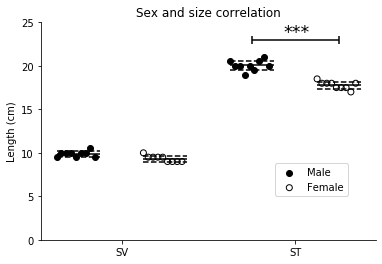

In [4]:
# Import libraries.
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
import scipy.stats

# Read the data.

df = pd.read_excel(io="SV_ST_1yearold-formated-for-jupyter.xlsx", sheet_name="Sheet2")
SVMale = df["SV Male"]
SVFemale = df["SV Female"]
STMale = df["ST Male"]
STFemale = df["ST Female"]

# Define the positions where the data is going to be drawn.

pos1=np.arange(1,2,1/len(SVMale))
pos2=np.arange(3,4,1/len(SVFemale))
pos3=np.arange(5,6,1/len(STMale))
pos4=np.arange(7,8,1/len(STFemale))

# Plot for Male SV.

plt.scatter(pos1,SVMale,color="black",label="Male")
plt.hlines(np.mean(SVMale),1,2)
plt.hlines(np.mean(SVMale)+np.std(SVMale),1,2,linestyles="dashed")
plt.hlines(np.mean(SVMale)-np.std(SVMale),1,2,linestyles="dashed")

# Plot for Female SV.

plt.scatter(pos2,SVFemale,facecolors='none', edgecolors='black',label="Female")
plt.hlines(np.mean(SVFemale),3,4)
plt.hlines(np.mean(SVFemale)+np.std(SVFemale),3,4,linestyles="dashed")
plt.hlines(np.mean(SVFemale)-np.std(SVFemale),3,4,linestyles="dashed")

# Plot for Male ST.

plt.scatter(pos3,STMale,color="black")
plt.hlines(np.mean(STMale),5,6)
plt.hlines(np.mean(STMale)+np.std(STMale),5,6,linestyles="dashed")
plt.hlines(np.mean(STMale)-np.std(STMale),5,6,linestyles="dashed")

# Plot for Female ST.

plt.scatter(pos4,STFemale,facecolors='none', edgecolors='black')
plt.hlines(np.mean(STFemale),7,8)
plt.hlines(np.mean(STFemale)+np.std(STFemale),7,8,linestyles="dashed")
plt.hlines(np.mean(STFemale)-np.std(STFemale),7,8,linestyles="dashed")

# Draw the information related to the probability.

plt.text(0.725, 0.93, "***", transform=plt.gca().transAxes, size='xx-large')
plt.hlines(23, 5.5, 7.5)
plt.vlines(5.5, 22.5, 23.4)
plt.vlines(7.5, 22.5, 23.4)

# Format.
plt.legend(loc=(0.7,0.2))
plt.ylim(0,25)
my_xticks = ['SV','ST']
x=[2.5,6.5]
plt.ylabel("Length (cm)")
plt.title("Sex and size correlation")
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xticks(x, my_xticks)
plt.savefig("Fig1H.png",dpi=300)
plt.show()
plt.close()